# Analiza Klastracji Krajów: Jak są Kategoryzowane?

Analiza pokazująca:
1. Jak kraje są klasyfikowane w każdym sektorze (Economy, Education, Healthcare, Infrastructure, Social)
2. Które parametry mają największy wpływ na klasyfikację
3. Profile klasterów w każdym sektorze

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. SEKTOR EKONOMII - Jak clasificuj się kraje?

In [ ]:
df_economy = pd.read_csv('data/economy/economy_clustered_final.csv')

print("=" * 80)
print("SEKTOR EKONOMII - Profile Klasterów")
print("=" * 80)

economic_features = [
    'GDP_PerCapita_PPP', 'GDP_Growth', 'Inflation', 
    'Agriculture_Share_GDP', 'Industry_Share_GDP', 'Services_Share_GDP', 
    'Unemployment_Rate', 'Remittances_GDP', 'High_Tech_Exports', 'FDI_Inflows'
]

economy_means = df_economy.groupby('Cluster_Name')[economic_features].mean()
print("\nŚrednie wskaźniki dla każdego klastera:")
print(economy_means.round(2))

print("\n\nLiczba krajów w każdym klastrze:")
print(df_economy['Cluster_Name'].value_counts())

print("\n\nPrzykłady krajów w każdym klastrze:")
for cluster in df_economy['Cluster_Name'].unique():
    countries = df_economy[df_economy['Cluster_Name'] == cluster]['country'].head(5).tolist()
    print(f"\n{cluster}: {', '.join(countries)}")

SEKTOR EKONOMII - Profile Klasterów

Średnie wskaźniki dla każdego klastera:
              GDP_PerCapita_PPP  GDP_Growth  Inflation  Agriculture_Share_GDP  \
Cluster_Name                                                                    
Developed              53212.32        2.22       2.73                   2.84   
Developing             24465.22        3.63       5.40                   6.73   
Economy Hub            94011.12        3.70       1.83                   0.53   
Struggling              7171.23        3.73      14.10                  20.86   

              Industry_Share_GDP  Services_Share_GDP  Unemployment_Rate  \
Cluster_Name                                                              
Developed                  21.85               66.41               5.56   
Developing                 32.94               54.04               9.24   
Economy Hub                10.49               79.81               4.75   
Struggling                 23.43               47.87         


WAŻNOŚĆ CECH - Co decyduje o klasyfikacji ekonomicznej?

Top 5 najważniejszych cech dla klasyfikacji ekonomicznej:
                   Cecha      Waga
3  Agriculture_Share_GDP  0.230241
0      GDP_PerCapita_PPP  0.198457
5     Services_Share_GDP  0.153976
4     Industry_Share_GDP  0.094619
8      High_Tech_Exports  0.085997
7        Remittances_GDP  0.081559
6      Unemployment_Rate  0.052741
2              Inflation  0.038818
1             GDP_Growth  0.036317
9            FDI_Inflows  0.027274


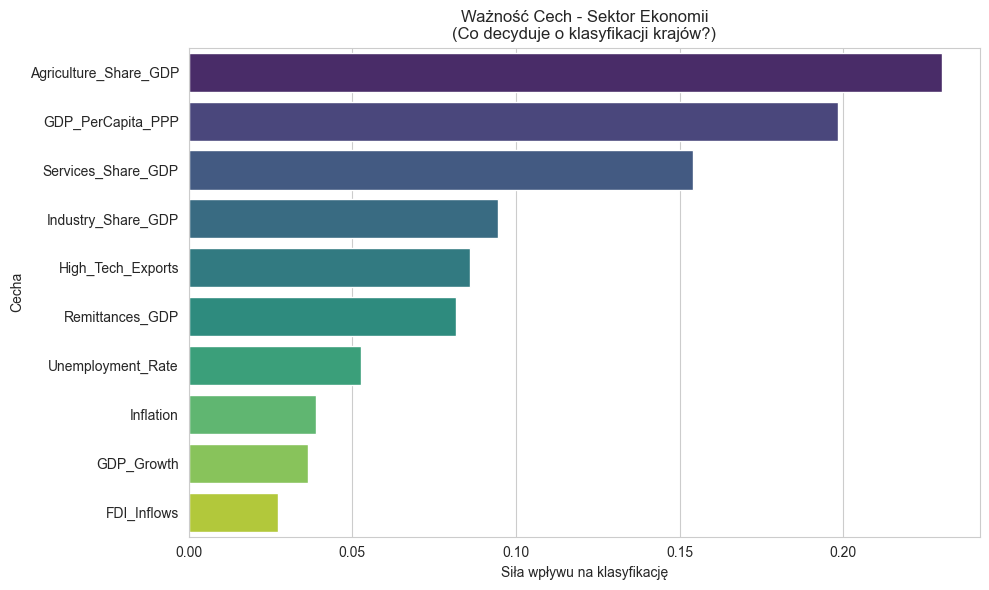

In [ ]:
print("\n" + "=" * 80)
print("WAŻNOŚĆ CECH - Co decyduje o klasyfikacji ekonomicznej?")
print("=" * 80)

X_economy = df_economy[economic_features].fillna(df_economy[economic_features].median())
y_economy = pd.factorize(df_economy['Cluster_Name'])[0]

scaler = StandardScaler()
X_economy_scaled = scaler.fit_transform(X_economy)

rf_economy = RandomForestClassifier(n_estimators=100, random_state=42)
rf_economy.fit(X_economy_scaled, y_economy)

importance_economy = pd.DataFrame({
    'Cecha': economic_features,
    'Waga': rf_economy.feature_importances_
}).sort_values('Waga', ascending=False)

print("\nTop 5 najważniejszych cech dla klasyfikacji ekonomicznej:")
print(importance_economy.head(10))

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=importance_economy, x='Waga', y='Cecha', palette='viridis')
plt.title('Ważność Cech - Sektor Ekonomii\n(Co decyduje o klasyfikacji krajów?)')
plt.xlabel('Siła wpływu na klasyfikację')
plt.tight_layout()
plt.show()

## 2. SEKTOR EDUKACJI - Jak się klasyfikują kraje?

In [15]:
# Wczytaj dane edukacyjne
df_education = pd.read_csv('data/education/education_clustered_final.csv')

print("\n" + "=" * 80)
print("SEKTOR EDUKACJI - Profile Klasterów")
print("=" * 80)

# Cechy edukacyjne (wyklucz country i Category)
education_features = [col for col in df_education.columns 
                     if col not in ['country', 'Category', 'Cluster_ID', 'Cluster_Name']]

# Oblicz średnie dla każdego klastera
education_means = df_education.groupby('Cluster_Name')[education_features].mean()
print("\nŚrednie wskaźniki dla każdego klastera (edukacja):")
print(education_means.round(2))

print("\n\nLiczba krajów w każdym klastrze:")
print(df_education['Cluster_Name'].value_counts())

print("\n\nPrzykłady krajów w każdym klastrze:")
for cluster in sorted(df_education['Cluster_Name'].unique()):
    countries = df_education[df_education['Cluster_Name'] == cluster]['country'].head(5).tolist()
    print(f"\n{cluster}: {', '.join(countries)}")


SEKTOR EDUKACJI - Profile Klasterów

Średnie wskaźniki dla każdego klastera (edukacja):
              Tertiary_Enrollment  Internet_Usage  Patents_NonResidents  \
Cluster_Name                                                              
Developed                   61.78           86.16               3676.84   
Developing                   4.66           65.49                 14.50   
Global Hubs                 64.72           85.72             409608.50   
Struggling                  15.87           39.27               3724.11   

              Scientific_Articles  Primary_Completion_Rate  \
Cluster_Name                                                 
Developed                26667.74                    96.52   
Developing               27760.43                    36.70   
Global Hubs            1378525.28                    94.73   
Struggling               28097.19                    77.83   

              Gov_Expenditure_Educ_GDP  Secondary_Enrollment  Compulsory_Years  
Cluste


WAŻNOŚĆ CECH - Co decyduje o klasyfikacji edukacyjnej?

Top 5 najważniejszych cech dla klasyfikacji edukacyjnej:
                      Cecha      Waga
1            Internet_Usage  0.261147
0       Tertiary_Enrollment  0.192070
6      Secondary_Enrollment  0.135565
3       Scientific_Articles  0.120189
4   Primary_Completion_Rate  0.115027
2      Patents_NonResidents  0.064839
5  Gov_Expenditure_Educ_GDP  0.059914
7          Compulsory_Years  0.051249


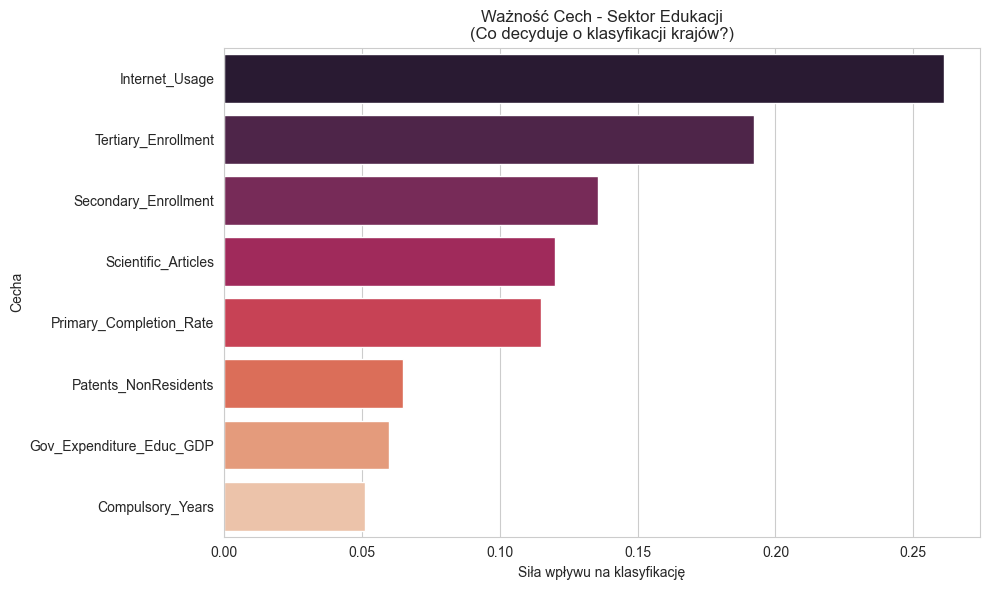

In [16]:
# Analiza ważności cech dla klasyfikacji edukacyjnej
print("\n" + "=" * 80)
print("WAŻNOŚĆ CECH - Co decyduje o klasyfikacji edukacyjnej?")
print("=" * 80)

# Przygotuj dane
X_education = df_education[education_features].fillna(df_education[education_features].median())
y_education = pd.factorize(df_education['Cluster_Name'])[0]

# Skalowanie
scaler_edu = StandardScaler()
X_education_scaled = scaler_edu.fit_transform(X_education)

# Model Random Forest
rf_education = RandomForestClassifier(n_estimators=100, random_state=42)
rf_education.fit(X_education_scaled, y_education)

# Ważność cech
importance_education = pd.DataFrame({
    'Cecha': education_features,
    'Waga': rf_education.feature_importances_
}).sort_values('Waga', ascending=False)

print("\nTop 5 najważniejszych cech dla klasyfikacji edukacyjnej:")
print(importance_education.head(10))

# Wizualizacja
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=importance_education.head(10), x='Waga', y='Cecha', palette='rocket')
plt.title('Ważność Cech - Sektor Edukacji\n(Co decyduje o klasyfikacji krajów?)')
plt.xlabel('Siła wpływu na klasyfikację')
plt.tight_layout()
plt.show()

## 3. SEKTOR ZDROWOTNOŚCI - Jak się klasyfikują kraje?

In [ ]:
df_healthcare = pd.read_csv('data/healthcare/healthcare_clustered_final.csv')

print("\n" + "=" * 80)
print("SEKTOR ZDROWOTNOŚCI - Profile Klasterów")
print("=" * 80)

healthcare_features = [col for col in df_healthcare.columns 
                       if col not in ['country', 'Category', 'Cluster_ID', 'Cluster_Name']]

healthcare_means = df_healthcare.groupby('Cluster_Name')[healthcare_features].mean()
print("\nŚrednie wskaźniki dla każdego klastera (zdrowotność):")
print(healthcare_means.round(2))

print("\n\nLiczba krajów w każdym klastrze:")
print(df_healthcare['Cluster_Name'].value_counts())

print("\n\nPrzykłady krajów w każdym klastrze:")
for cluster in sorted(df_healthcare['Cluster_Name'].unique()):
    countries = df_healthcare[df_healthcare['Cluster_Name'] == cluster]['country'].head(5).tolist()
    print(f"\n{cluster}: {', '.join(countries)}")


SEKTOR ZDROWOTNOŚCI - Profile Klasterów

Średnie wskaźniki dla każdego klastera (zdrowotność):
              Life_Expectancy  Infant_Mortality  Fertility_Rate  \
Cluster_Name                                                      
Developed               79.71              4.22            1.48   
Developing              73.81             16.09            2.13   
Struggling              64.20             42.56            4.13   

              Mortality_rate_under_5  Population_Ages_65_plus  \
Cluster_Name                                                    
Developed                       4.98                    19.13   
Developing                     19.22                     8.06   
Struggling                     60.65                     3.36   

              Health_Expenditure_GDP  Out_of_Pocket_Exp  Age_Dependency_Ratio  
Cluster_Name                                                                   
Developed                       9.53              18.96                 54.94  
De


WAŻNOŚĆ CECH - Co decyduje o klasyfikacji zdrowotności?

Top 5 najważniejszych cech dla klasyfikacji zdrowotności:
                     Cecha      Waga
1         Infant_Mortality  0.224973
3   Mortality_rate_under_5  0.181482
4  Population_Ages_65_plus  0.178317
2           Fertility_Rate  0.146962
0          Life_Expectancy  0.124127
7     Age_Dependency_Ratio  0.069990
5   Health_Expenditure_GDP  0.047985
6        Out_of_Pocket_Exp  0.026163


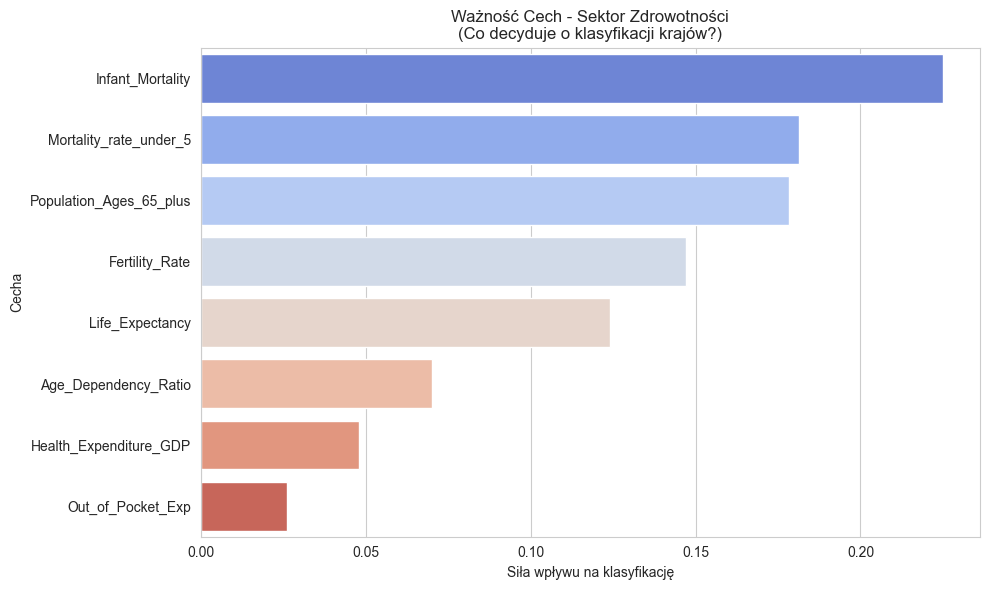

In [ ]:
print("\n" + "=" * 80)
print("WAŻNOŚĆ CECH - Co decyduje o klasyfikacji zdrowotności?")
print("=" * 80)

X_healthcare = df_healthcare[healthcare_features].fillna(df_healthcare[healthcare_features].median())
y_healthcare = pd.factorize(df_healthcare['Cluster_Name'])[0]

scaler_health = StandardScaler()
X_healthcare_scaled = scaler_health.fit_transform(X_healthcare)

rf_healthcare = RandomForestClassifier(n_estimators=100, random_state=42)
rf_healthcare.fit(X_healthcare_scaled, y_healthcare)

importance_healthcare = pd.DataFrame({
    'Cecha': healthcare_features,
    'Waga': rf_healthcare.feature_importances_
}).sort_values('Waga', ascending=False)

print("\nTop 5 najważniejszych cech dla klasyfikacji zdrowotności:")
print(importance_healthcare.head(10))

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=importance_healthcare.head(10), x='Waga', y='Cecha', palette='coolwarm')
plt.title('Ważność Cech - Sektor Zdrowotności\n(Co decyduje o klasyfikacji krajów?)')
plt.xlabel('Siła wpływu na klasyfikację')
plt.tight_layout()
plt.show()

## 4. SEKTOR INFRASTRUKTURY - Jak się klasyfikują kraje?

In [ ]:
df_infrastructure = pd.read_csv('data/infrastructure/infrastructure_clustered_final.csv')

print("\n" + "=" * 80)
print("SEKTOR INFRASTRUKTURY - Profile Klasterów")
print("=" * 80)

infrastructure_features = [col for col in df_infrastructure.columns 
                           if col not in ['country', 'Category', 'Cluster_ID', 'Cluster_Name']]

infrastructure_means = df_infrastructure.groupby('Cluster_Name')[infrastructure_features].mean()
print("\nŚrednie wskaźniki dla każdego klastera (infrastruktura):")
print(infrastructure_means.round(2))

print("\n\nLiczba krajów w każdym klastrze:")
print(df_infrastructure['Cluster_Name'].value_counts())

print("\n\nPrzykłady krajów w każdym klastrze:")
for cluster in sorted(df_infrastructure['Cluster_Name'].dropna().unique(), key=str):
    countries = df_infrastructure[df_infrastructure['Cluster_Name'] == cluster]['country'].head(5).tolist()
    print(f"\n{cluster}: {', '.join(countries)}")


SEKTOR INFRASTRUKTURY - Profile Klasterów

Średnie wskaźniki dla każdego klastera (infrastruktura):
              Access_to_Electricity  Access_to_Safe_Water  Internet_Usage  \
Cluster_Name                                                                
Developed                     52.61                 28.60           31.44   
Developing                    97.65                 84.67           84.86   
Economy Hub                   94.29                 54.70           62.83   
Struggling                    99.86                 85.42           88.89   

              Fixed_Broadband_Subs  Air_Transport_Passengers  \
Cluster_Name                                                   
Developed                     0.92              1.647600e+07   
Developing                   30.13              1.786966e+09   
Economy Hub                   4.21              4.554192e+07   
Struggling                   27.24              3.878774e+07   

              Electric_Power_Consumption  Renewable

## 5. SEKTOR SPOŁECZNY - Jak się klasyfikują kraje?

In [24]:
df_social = pd.read_csv('data/social/social_clustered_final.csv')

print("\n" + "=" * 80)
print("SEKTOR SPOŁECZNY - Profile Klasterów")
print("=" * 80)

social_features = [col for col in df_social.columns 
                   if col not in ['country', 'Category', 'Cluster_ID', 'Cluster_Name']]

social_means = df_social.groupby('Cluster_Name')[social_features].mean()
print("\nŚrednie wskaźniki dla każdego klastera (społeczeństwo):")
print(social_means.round(2))

print("\n\nLiczba krajów w każdym klastrze:")
print(df_social['Cluster_Name'].value_counts())

print("\n\nPrzykłady krajów w każdym klastrze:")
for cluster in sorted(df_social['Cluster_Name'].unique()):
    countries = df_social[df_social['Cluster_Name'] == cluster]['country'].head(5).tolist()
    print(f"\n{cluster}: {', '.join(countries)}")


SEKTOR SPOŁECZNY - Profile Klasterów

Średnie wskaźniki dla każdego klastera (społeczeństwo):
              Urbanization_Rate  Rural_Population_Growth  \
Cluster_Name                                               
Developed                 72.15                    -0.92   
Developing                50.41                     0.67   
Struggling                40.10                     1.44   

              Employment_In_Agriculture  Population_Ages_65_and_above  \
Cluster_Name                                                            
Developed                         10.75                         15.01   
Developing                        26.10                          5.98   
Struggling                        49.28                          3.25   

              Population_Ages_0_14  Age_Dependency_Ratio  Women_In_Parliament  \
Cluster_Name                                                                    
Developed                    18.52                 50.91                30.2


WAŻNOŚĆ CECH - Co decyduje o klasyfikacji ekonomicznej?

Top 5 najważniejszych cech dla klasyfikacji społecznej:
                           Cecha      Waga
8          Access_to_Electricity  0.195246
3   Population_Ages_65_and_above  0.192982
4           Population_Ages_0_14  0.189777
7     Female_Labor_Participation  0.111145
2      Employment_In_Agriculture  0.084017
5           Age_Dependency_Ratio  0.058141
9           Mobile_Subscriptions  0.046933
0              Urbanization_Rate  0.044464
6            Women_In_Parliament  0.035561
10         Intentional_Homicides  0.020911


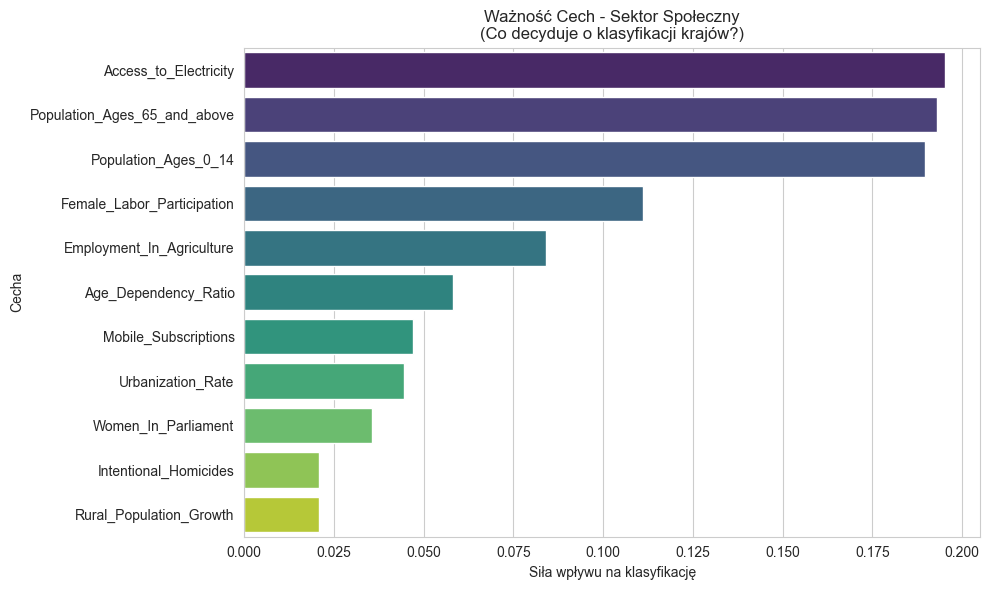

In [21]:
print("\n" + "=" * 80)
print("WAŻNOŚĆ CECH - Co decyduje o klasyfikacji ekonomicznej?")
print("=" * 80)

X_social = df_social[social_features].fillna(df_social[social_features].median())
y_social = pd.factorize(df_social['Cluster_Name'])[0]

scaler = StandardScaler()
X_social_scaled = scaler.fit_transform(X_social)
rf_social = RandomForestClassifier(n_estimators=100, random_state=42)
rf_social.fit(X_social_scaled, y_social)

importance_social = pd.DataFrame({
    'Cecha': social_features,
    'Waga': rf_social.feature_importances_
}).sort_values('Waga', ascending=False)

print("\nTop 5 najważniejszych cech dla klasyfikacji społecznej:")
print(importance_social.head(10))

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=importance_social, x='Waga', y='Cecha', palette='viridis')
plt.title('Ważność Cech - Sektor Społeczny\n(Co decyduje o klasyfikacji krajów?)')
plt.xlabel('Siła wpływu na klasyfikację')
plt.tight_layout()
plt.show()